Article :

https://towardsdatascience.com/dbscan-algorithm-complete-guide-and-application-with-python-scikit-learn-d690cbae4c5d

Github: https://github.com/suvoooo/Machine_Learning/tree/master/DBSCAN_Complete

In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 863 kB 7.6 MB/s 
     |████████████████████████████████| 6.3 MB 32.4 MB/s 
     |████████████████████████████████| 219 kB 61.4 MB/s 
     |████████████████████████████████| 30.5 MB 324 kB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=56b11f885d3ae702dace6e3d32ee285f70b18f956b1ee1e952817e8f77892942
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [ ]:
print ("Matplotlib Version", matplotlib.__version__)

Matplotlib Version 3.2.2


In [ ]:
import pandas as pd
weather_df = pd.read_csv("/content/weather-stations (1).csv")
print("Shape of the DataFrame : ", weather_df.shape)
weather_df.head(3)

Shape of the DataFrame :  (1341, 25)


,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055


In [ ]:
weather_df.isna().sum()

Stn_Name       0
Lat            0
Long           0
Prov           0
Tm            85
DwTm          85
D            984
Tx            81
DwTx          81
Tn            81
DwTn          81
S            755
DwS          755
S%N         1143
P            114
DwP          114
P%N         1132
S_G          543
Pd           114
BS          1341
DwBS        1341
BS%         1341
HDD           85
CDD           85
Stn_No         0
dtype: int64

In [ ]:
weather_df.dropna(subset=["Tm", "Tx", "Tn"], inplace=True)
print ("After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column: ", weather_df.shape)

After Dropping Rows that contains NaN on Mean, Max, Min Temperature Column:  (1255, 25)


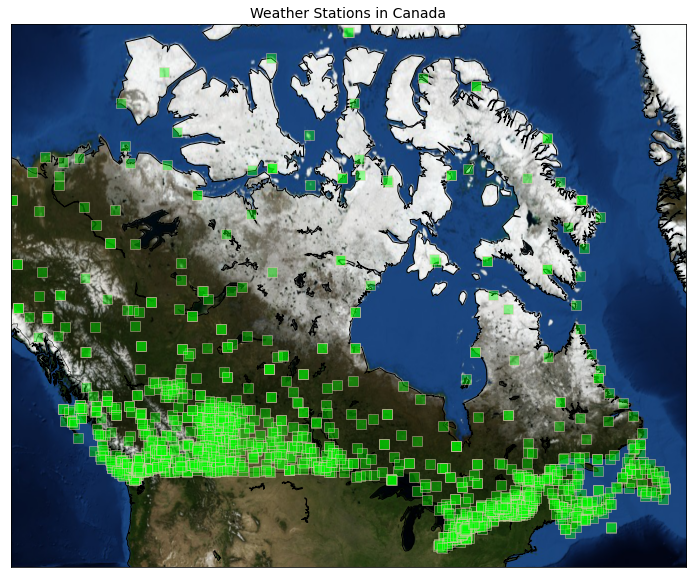

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib
from PIL import Image
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)


llon=-140
ulon=-50
llat=40
ulat=75

# selecting the boundaries of the map from lattitude and longitude 

weather_df = weather_df[(weather_df['Long'] > llon) & (weather_df['Long'] < ulon) & 
                        (weather_df['Lat'] > llat) &(weather_df['Lat'] < ulat)]



my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
my_map.bluemarble()      

xs,ys = my_map(np.asarray(weather_df.Long), np.asarray(weather_df.Lat))
weather_df['xm']= xs.tolist()
weather_df['ym'] =ys.tolist()

#Visualization1
for index,row in weather_df.iterrows():
   my_map.plot(row.xm, row.ym,markerfacecolor ='lime',markeredgecolor='pink', marker='s', markersize= 10, alpha = 0.4)
plt.title("Weather Stations in Canada", fontsize=14)
plt.savefig("Canada_WS.png", dpi=300)
plt.show()

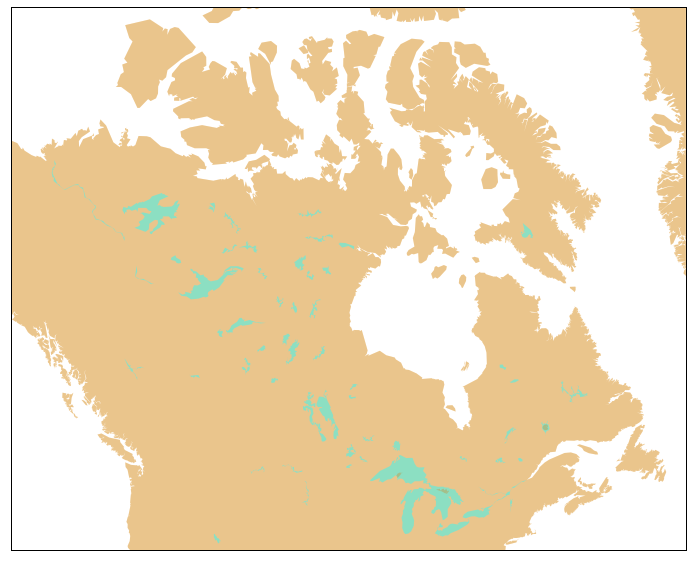

In [ ]:
my_map.drawmapboundary()
my_map.fillcontinents(color = 'orange', alpha = 0.3)
my_map.fillcontinents(color='#cc9955', lake_color='aqua', alpha=0.4)

Clustering

In [ ]:
print ("Minimum Mean temperature: ", weather_df['Tm'].min())
print ("Minimum Max Temperature: ", weather_df['Tx'].min())
print ("Maximun Min Temperature: ", weather_df['Tn'].max())

Minimum Mean temperature:  -37.0
Minimum Max Temperature:  -28.9
Maximun Min Temperature:  5.3


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


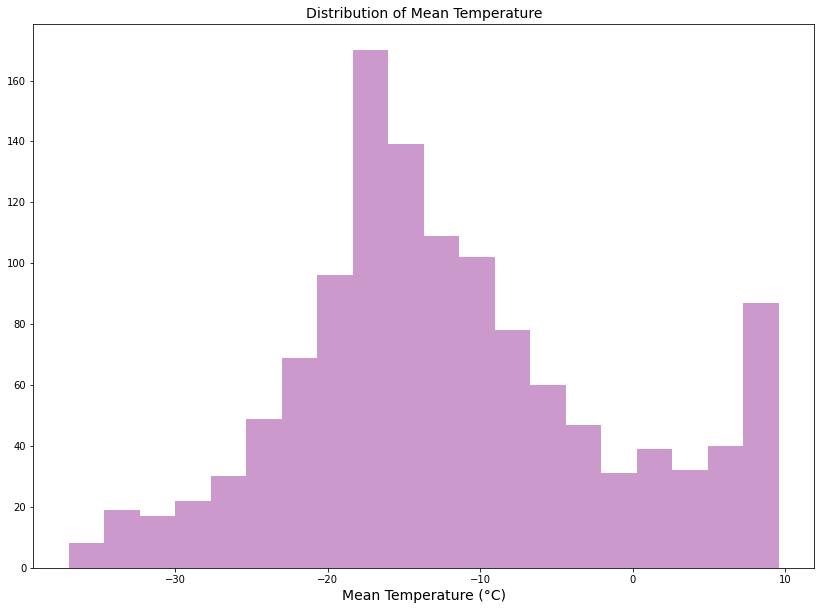

In [ ]:
import seaborn as sns

sns.distplot(weather_df['Tm'], color='purple', kde=False)
plt.xlabel('Mean Temperature (°C)', fontsize=14)
plt.title("Distribution of Mean Temperature", fontsize=14)
plt.savefig("Dist_of_Mean_Temp.png", dpi=200)
plt.show()

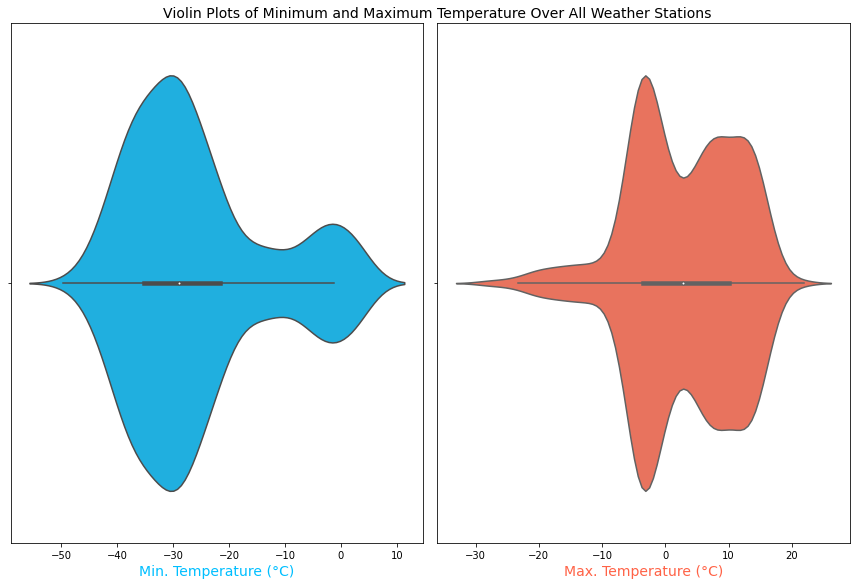

In [ ]:
# Violin Plots
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.violinplot(x=weather_df["Tn"], color='deepskyblue')
plt.xlabel("Min. Temperature (°C)", fontsize=14, color='deepskyblue')
plt.subplot(1,2,2)
sns.violinplot(x=weather_df["Tx"], color='tomato')
plt.xlabel("Max. Temperature (°C)", fontsize=14, color='tomato')
plt.tight_layout()
plt.title("Violin Plots of Minimum and Maximum Temperature Over All Weather Stations", fontsize=14, x=-0.0)
plt.savefig("Violin_Plots_Min_Max_Temp.png", dpi=200)
plt.show()

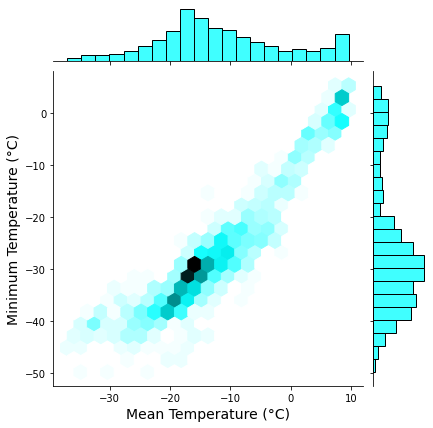

In [ ]:
g=sns.jointplot(x=weather_df['Tm'], y=weather_df['Tn'], kind='hex', color='cyan')
g.set_axis_labels("Mean Temperature (°C)","Minimum Temperature (°C)", fontsize=14)
plt.savefig("Hex_Tm_Tn.png", dpi=200)
plt.show()

DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
weather_df_clus_temp = weather_df[["Tm", "Tx", "Tn", "xm", "ym"]]
weather_df_clus_temp = StandardScaler().fit_transform(weather_df_clus_temp)

db = DBSCAN(eps=0.3, min_samples=10).fit(weather_df_clus_temp)
labels = db.labels_
print (labels[500:560])
weather_df["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

[ 4  4  4  4  4  4  4  4  4  3  4  3  4  3  4  4  4  4  4  4  4  4  4  4
  4  4 -1  4  4  4 -1  4 -1  3 -1  4 -1  3  3  3  3  3  3  3  3  3  3  3
 -1 -1  3  3  3  3 -1  3  3  3  3  3]


In [ ]:
set(labels)

{-1, 0, 1, 2, 3, 4, 5, 6, 7}

Plotting with Map

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Cluster 0, Average Mean Temp: 6.2406779661016945
Cluster 1, Average Mean Temp: -0.5523809523809524
Cluster 2, Average Mean Temp: -3.244444444444445
Cluster 3, Average Mean Temp: -13.733725490196077
Cluster 4, Average Mean Temp: -4.153703703703704
Cluster 5, Average Mean Temp: -16.401294498381876
Cluster 6, Average Mean Temp: -10.08421052631579
Cluster 7, Average Mean Temp: -4.706250000000001


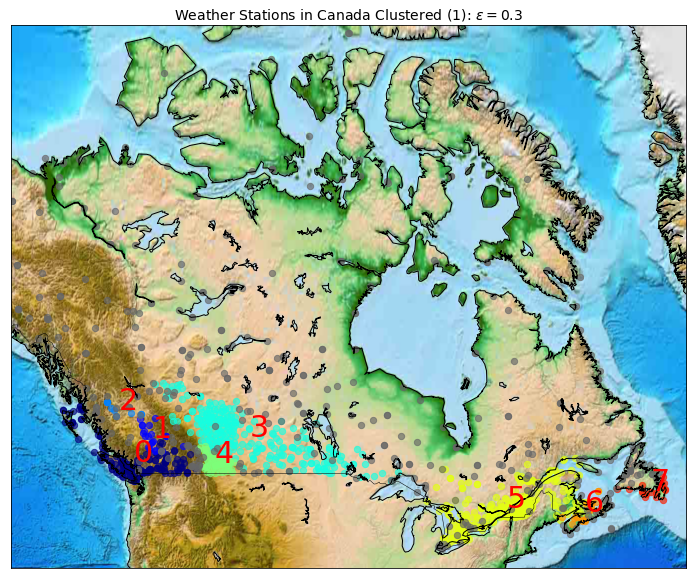

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=ulon, urcrnrlat=ulat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
my_map.etopo()

#Color
colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))



#Visualization
for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = weather_df[weather_df.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx,ceny,str(clust_number), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number)+', Average Mean Temp: '+ str(np.mean(clust_set.Tm)))
plt.title(r"Weather Stations in Canada Clustered (1): $ \epsilon = 0.3$", fontsize=14)        
plt.savefig("etopo_cluster.png", dpi=300) 

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
weather_df_copy = weather_df.copy()
weather_df_clus_temp_P = weather_df_copy[["Tm", "Tx", "Tn", "xm", "ym", "P"]]

weather_df_clus_temp_P.dropna(subset=["Tm", "Tx", "Tn", "xm", "ym", "P"], inplace=True)
print ("After Dropping Rows that contains NaN on Precipitation Column: ", weather_df_clus_temp_P.shape)

print (weather_df_clus_temp_P.head(6))

After Dropping Rows that contains NaN on Precipitation Column:  (1136, 6)
    Tm    Tx   Tn            xm            ym      P
0  8.2  13.5  1.0  1.807806e+06  1.396332e+06  178.8
1  7.0  15.0 -3.0  1.764329e+06  1.377564e+06  258.6
2  6.8  16.0 -2.5  1.773336e+06  1.378409e+06  264.6
4  7.7  14.5 -1.0  1.809363e+06  1.362546e+06  168.4
5  8.8  13.1  1.9  1.841498e+06  1.311615e+06   81.0
6  8.9  13.5  2.0  1.826598e+06  1.404800e+06  110.0


In [ ]:
weather_df_clus_temp_P_arr = weather_df_clus_temp_P[["Tm", "Tx", "Tn", "xm", "ym", "P"]]
weather_df_clus_temp_P_arr = StandardScaler().fit_transform(weather_df_clus_temp_P_arr)

db_P = DBSCAN(eps=0.5, min_samples=10).fit(weather_df_clus_temp_P_arr)
labels_P = db_P.labels_
print(labels_P[500:560])
print (labels_P.dtype)
weather_df_clus_temp_P["Clus_Db_"]=labels_P

[ 1  1  1 -1 -1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1 -1 -1 -1  1 -1
 -1 -1  1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1]
int64


In [ ]:
weather_df_clus_temp_P.head(6)

,Tm,Tx,Tn,xm,ym,P,Clus_Db_
0,8.2,13.5,1.0,1.807806e+06,1.396332e+06,178.8,0
1,7.0,15.0,-3.0,1.764329e+06,1.377564e+06,258.6,-1
2,6.8,16.0,-2.5,1.773336e+06,1.378409e+06,264.6,-1
4,7.7,14.5,-1.0,1.809363e+06,1.362546e+06,168.4,0
5,8.8,13.1,1.9,1.841498e+06,1.311615e+06,81.0,0
6,8.9,13.5,2.0,1.826598e+06,1.404800e+06,110.0,0


In [ ]:
realClusterNum_P=len(set(labels_P)) - (1 if -1 in labels_P else 0)
clusterNum_P = len(set(labels_P)) 


print (set(labels_P))

{0, 1, 2, 3, -1}


In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (14,10)

my_map1 = Basemap(projection='merc',
            resolution = 'l', area_thresh = 1000.0,
            llcrnrlon=llon, llcrnrlat=llat,
            urcrnrlon=ulon, urcrnrlat=ulat) 

my_map1.drawcoastlines()
my_map1.drawcountries()
my_map1.drawlsmask(land_color='orange', ocean_color='skyblue')
my_map1.etopo()

#color map
colors1 = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum_P))



#Visualization1
for clust_number_P in set(labels_P):
    c=(([0.4,0.4,0.4]) if clust_number_P == -1 else colors1[np.int(clust_number_P)])
    clust_set_P = weather_df_clus_temp_P[weather_df_clus_temp_P.Clus_Db_ == clust_number_P]                    
    my_map.scatter(clust_set_P.xm, clust_set_P.ym, color =c,  marker='o', s= 40, alpha = 0.65)
    if clust_number_P != -1:
        cenx=np.mean(clust_set_P.xm) 
        ceny=np.mean(clust_set_P.ym) 
        plt.text(cenx,ceny,str(clust_number_P), fontsize=30, color='red',)
        print ("Cluster "+str(clust_number_P)+', Average Mean Temp: '+ str(np.mean(clust_set_P.Tm)))
        print ("Cluster "+str(clust_number_P)+', Average Mean Precipitation: '+ str(np.mean(clust_set_P.P)))
plt.savefig("etopo_cluster_preci.png", dpi=300)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Cluster 0, Average Mean Temp: 7.680246913580247
Cluster 0, Average Mean Precipitation: 126.10000000000002
Cluster 1, Average Mean Temp: -12.53424283765348
Cluster 1, Average Mean Precipitation: 27.415006821282404
Cluster 2, Average Mean Temp: -26.142857142857135
Cluster 2, Average Mean Precipitation: 8.7
Cluster 3, Average Mean Temp: -10.406666666666666
Cluster 3, Average Mean Precipitation: 146.02333333333334
